#                       >>>>>> Data exploration and visualisation <<<<<<

In [ ]:
#import the required libraries for data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
#load the data set
df = pd.read_csv('/kaggle/input/cleaned/HR-Employee-Attrition-cleaned-data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Intermediate,Life Sciences,Medium,Female,...,Excellent,Poor,0,8,0,Poor,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Schooling,Life Sciences,High,Male,...,Outstanding,Outstanding,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Intermediate,Other,Very high,Male,...,Excellent,Good,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Masters,Life Sciences,Very high,Female,...,Excellent,Excellent,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Schooling,Medical,Low,Male,...,Excellent,Outstanding,1,6,3,Better,2,2,2,2


In [6]:
#The size of the data set
print('The total length of the dataset is: ',df.shape[0])
print('The total features are: ',df.shape[1])

The total length of the dataset is:  1470
The total features are:  31


The dataset is perfectly loaded.

**1. What is the attrition rate of the company?**

<Axes: ylabel='count'>

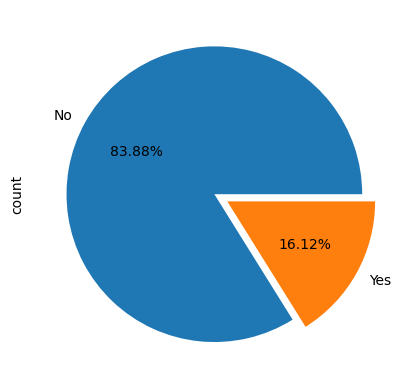

In [7]:
df['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct="%.2f%%")

**Observation:** As we see from the above pie chart, There is 16.12% of the employee attrition rate. This should be reduced as much as possible.

In [91]:
numerical_cols = df.select_dtypes(include = 'int')
categorical_cols = df.select_dtypes(include = 'object')

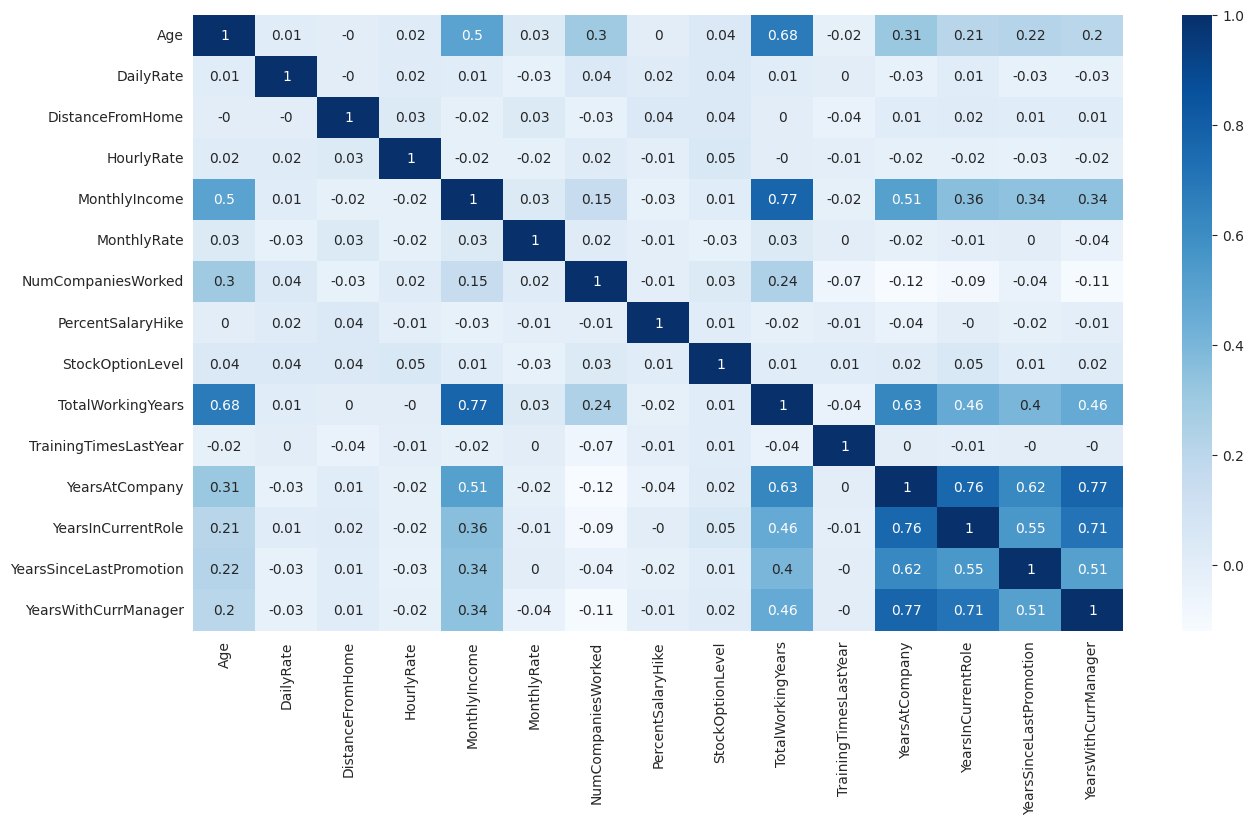

In [98]:
plt.figure(figsize=(15,8))
sns.heatmap(round(numerical_cols.corr(),2),annot=True,cmap="Blues")
plt.show()

***Observation:***
1. We can observe the correlations of the features.

In [12]:
df['Attrition'] = df['Attrition'].apply(lambda x : 0 if x == 'No' else 1) 
df1 = df.copy()
df1 = pd.get_dummies(df1)

<Axes: >

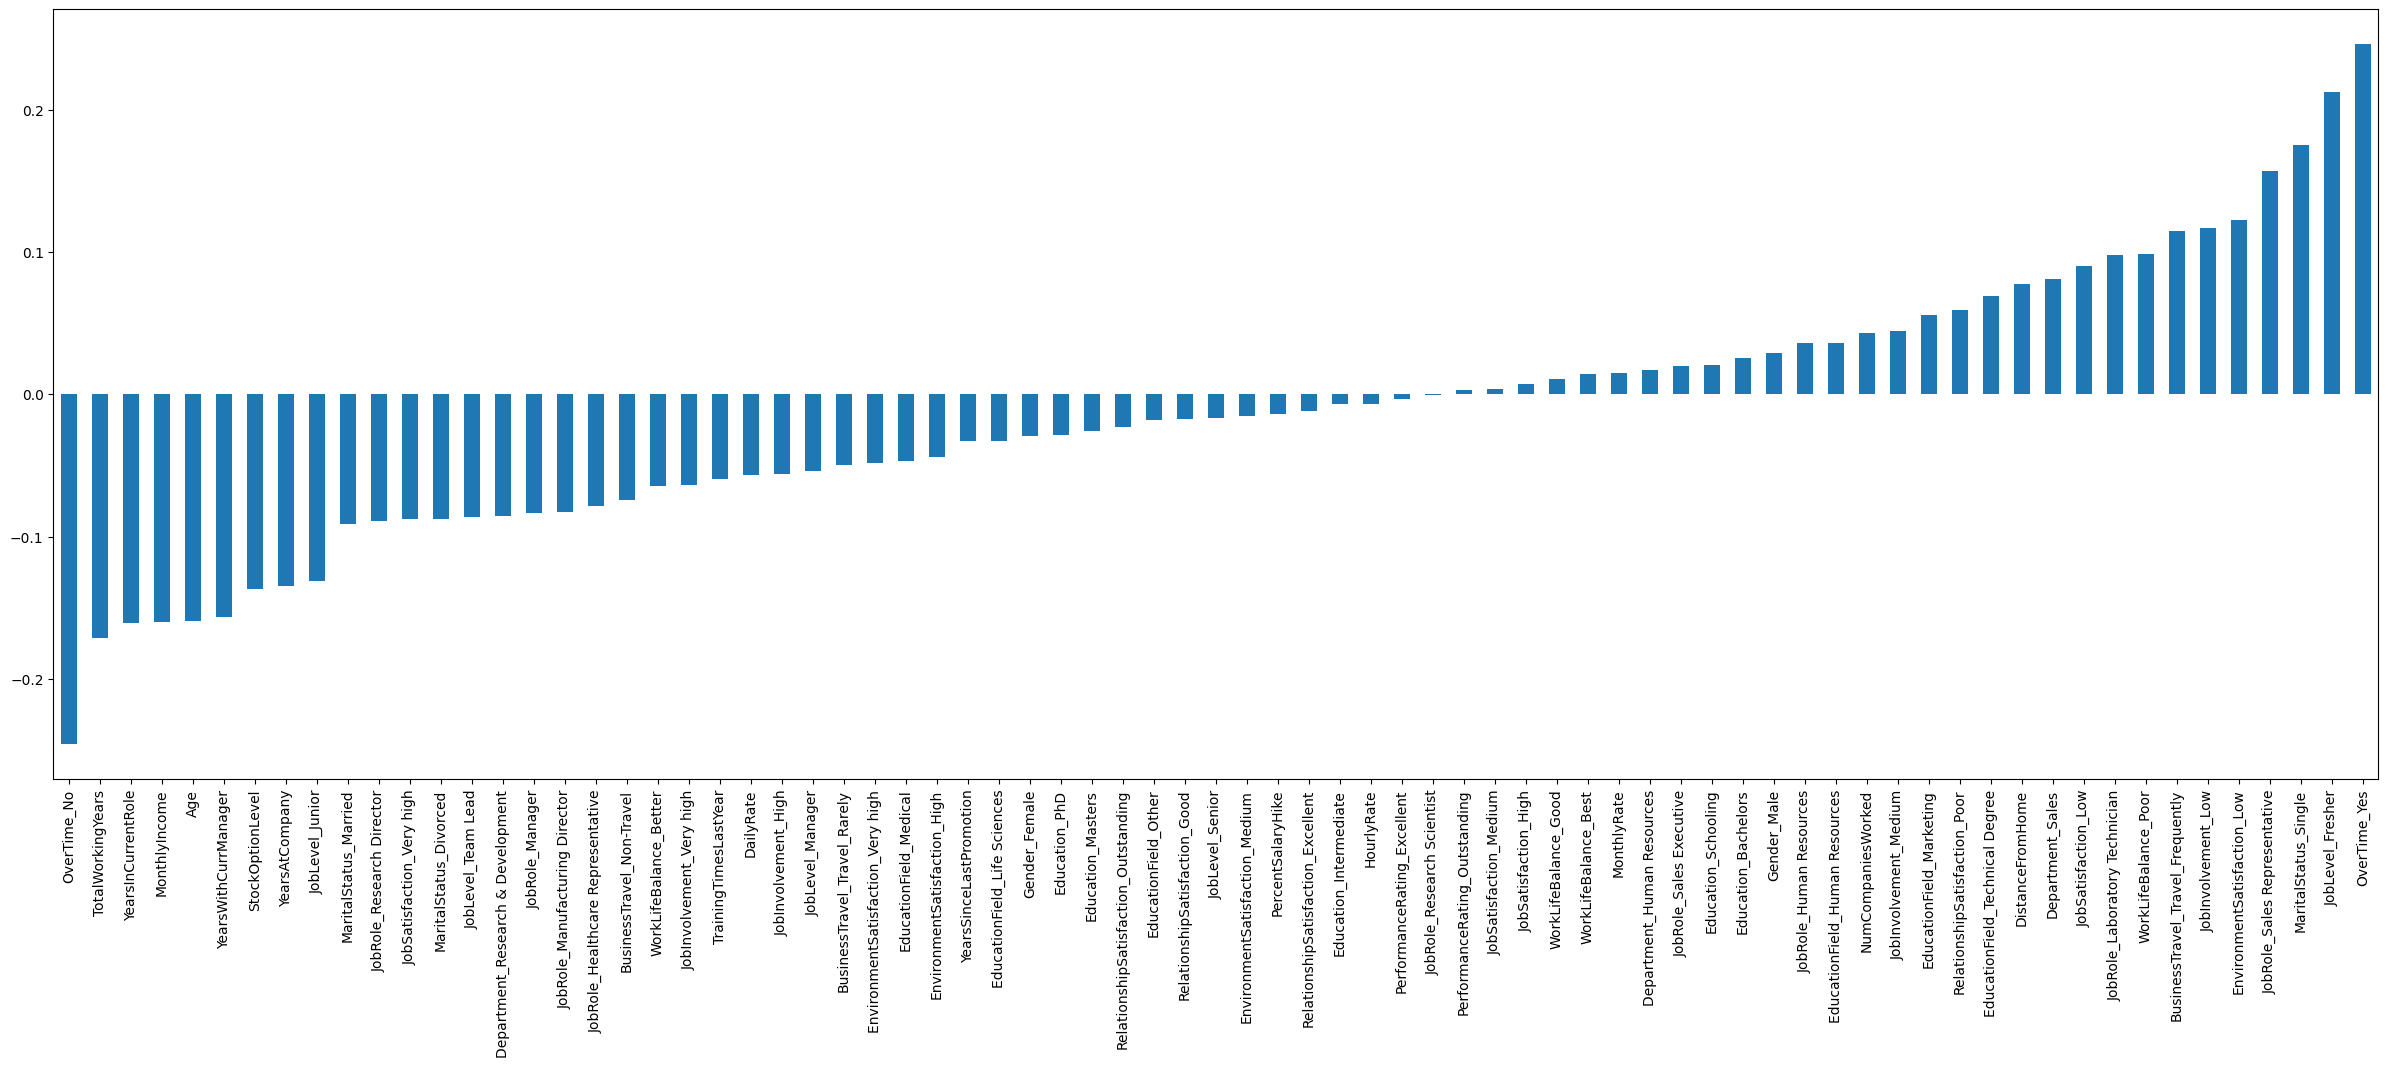

In [13]:
#Strength of correlation through visualisation
df1.drop('Attrition', axis=1).corrwith(df1.Attrition).sort_values().plot(kind='bar', figsize=(30, 10))

***Observation:***
This above plot shows us the strength of the features correlated with Attrition.

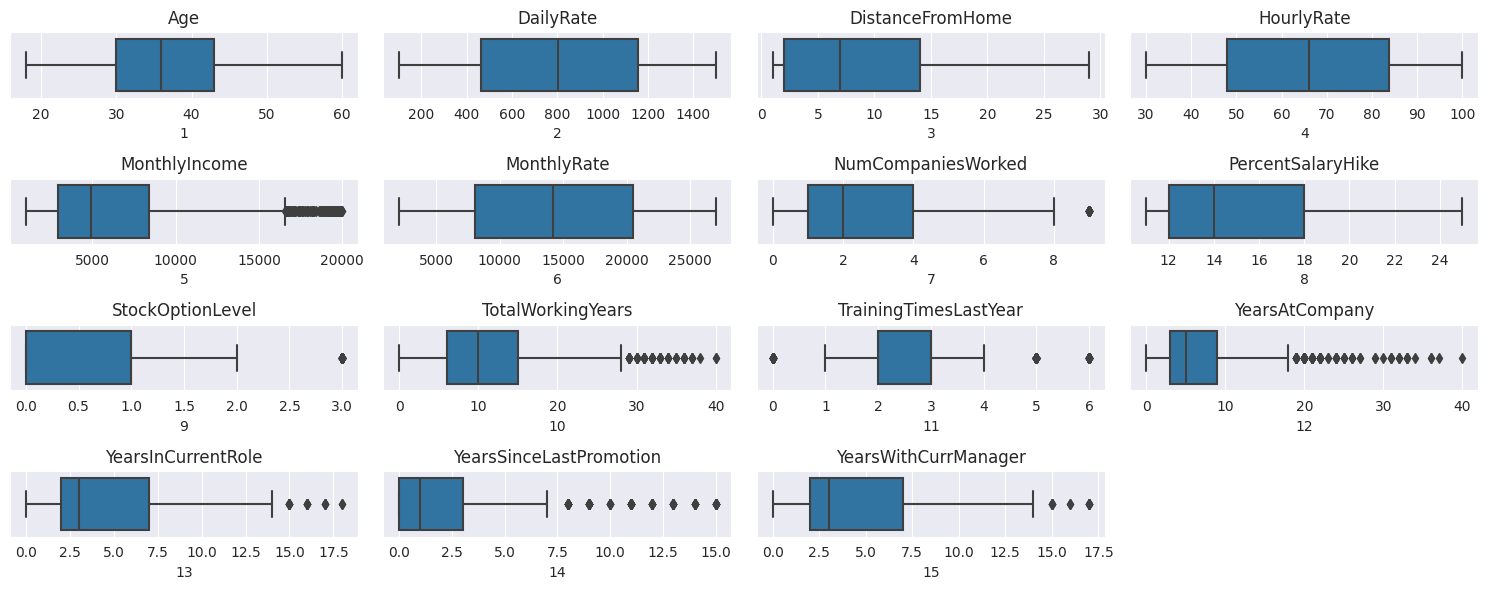

In [100]:
#Box plot
plt.figure(figsize = (15,6))
for i,q in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    plt.title(q)
    sns.boxplot(data=df,x=q)
    plt.xlabel(i+1)
plt.tight_layout()
plt.show()

**2. Do the employess with less hike are likely to increase the attrition rate?**

In [8]:
Hike_Att = pd.crosstab(df['PercentSalaryHike'], df['Attrition'])
Hike_Att['Attrition rate'] = (Hike_Att['Yes']/(Hike_Att['Yes'] + Hike_Att['No'])) *100
Hike_Att

Attrition,No,Yes,Attrition rate
PercentSalaryHike,,,
11,169,41,19.523810
12,165,33,16.666667
13,175,34,16.267943
14,177,24,11.940299
15,83,18,17.821782
16,64,14,17.948718
17,68,14,17.073171
18,76,13,14.606742
19,67,9,11.842105


<Axes: xlabel='PercentSalaryHike', ylabel='Attrition rate'>

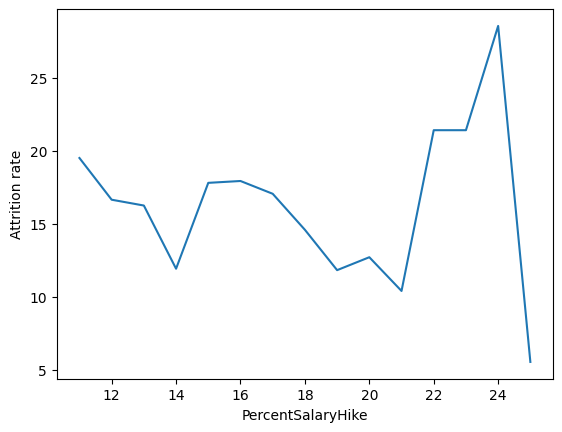

In [9]:
sns.lineplot(data = Hike_Att, x = Hike_Att.index, y = 'Attrition rate')

***Observation:*** 
1. We can clearly observe that there is a sharp increase of attrition rate after 21% of strike.
2. There is drastic decrease of attrition rate after 24% hike.
3. There is a continues decrease of attrition rate from 11% to 14% hike but it also increased again.

**3. In which department highest attrition took place?**

In [10]:
Dept_Att = pd.crosstab(df['Department'], df['Attrition'])
Dept_Att['Attrition rate'] = (Dept_Att['Yes']/(Dept_Att['Yes'] + Dept_Att['No'])) *100
Dept_Att

Attrition,No,Yes,Attrition rate
Department,,,
Human Resources,51,12,19.047619
Research & Development,828,133,13.839750
Sales,354,92,20.627803


<Axes: ylabel='Department'>

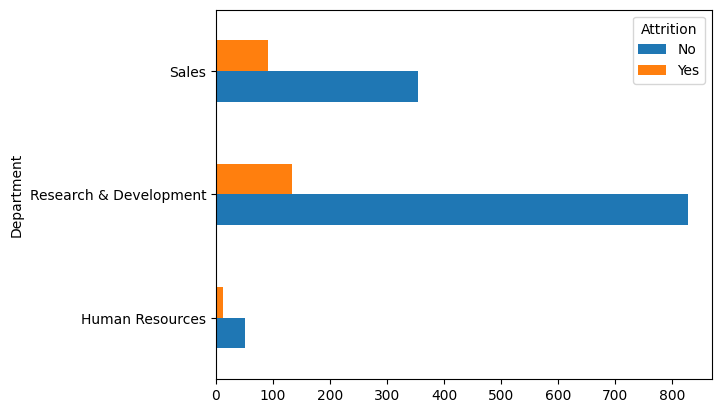

In [11]:
pd.crosstab(df['Department'],df['Attrition']).plot.barh()

***Observation:*** 
1. sales and Human Resources departments have higher attrition rate.
2. Most of the employees are of Research and Development department.

**4. How does the education impacts attrition?**

In [12]:
Educa_Att = pd.crosstab(df['Education'], df['Attrition'])
Educa_Att['Attrition rate'] = (Educa_Att['Yes']/(Educa_Att['Yes'] + Educa_Att['No'])) *100
Educa_Att

Attrition,No,Yes,Attrition rate
Education,,,
Bachelors,473,99,17.307692
Intermediate,238,44,15.602837
Masters,340,58,14.572864
PhD,43,5,10.416667
Schooling,139,31,18.235294


<Axes: ylabel='Education'>

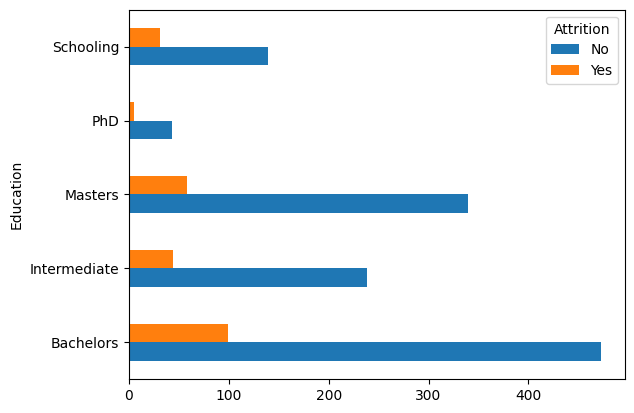

In [13]:
pd.crosstab(df['Education'],df['Attrition']).plot.barh()

***Observation:*** 
1. The schooling category has highest attrition rate while most of the employees are from Bachelors and Masters degree.

**5. In which category of business travel the attrition rate is higher?**

In [14]:
Busin_Att = pd.crosstab(df['BusinessTravel'], df['Attrition'])
Busin_Att['Attrition rate'] = (Busin_Att['Yes']/(Busin_Att['Yes'] + Busin_Att['No'])) *100
Busin_Att

Attrition,No,Yes,Attrition rate
BusinessTravel,,,
Non-Travel,138,12,8.000000
Travel_Frequently,208,69,24.909747
Travel_Rarely,887,156,14.956855


<Axes: ylabel='BusinessTravel'>

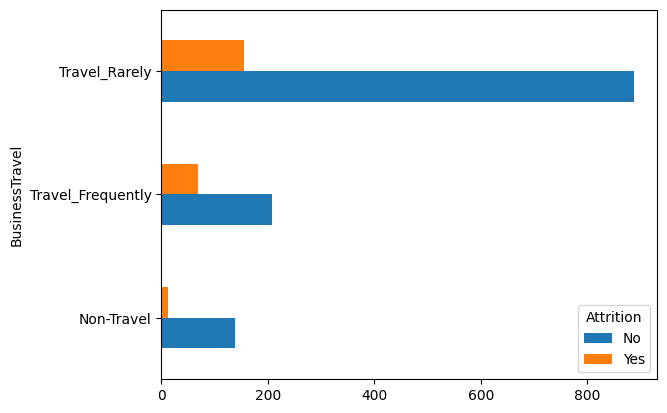

In [15]:
pd.crosstab(df['BusinessTravel'], df['Attrition']).plot.barh()

***Observation:***  
1. The employees who travel frequently are more likely to increase the attrition rate.
2. Most of the employees travel rarely.
3. Very less employees doesn't travel on business.

**6. In which department the bachelor degrees are more?**

In [16]:
df.groupby('Department')['Education'].value_counts()

Department              Education   
Human Resources         Bachelors        27
                        Masters          15
                        Intermediate     13
                        Schooling         5
                        PhD               3
Research & Development  Bachelors       379
                        Masters         255
                        Intermediate    182
                        Schooling       115
                        PhD              30
Sales                   Bachelors       166
                        Masters         128
                        Intermediate     87
                        Schooling        50
                        PhD              15
Name: count, dtype: int64

<Axes: ylabel='Department,Education'>

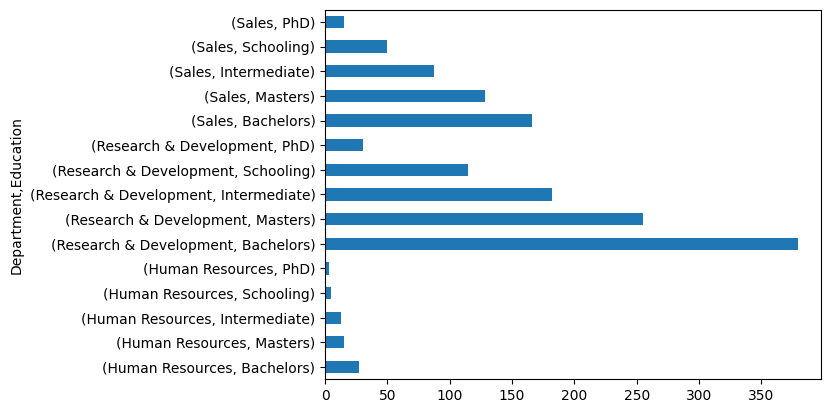

In [17]:
df.groupby('Department')['Education'].value_counts().plot.barh()

**Observation** 
1. There are many bachelor degrees in Research & Development department.
2. Not only bachelor degree many employees are from Research & Development department following various education standards.

**7. How does the employee past worked number of companies impact attrition?**

In [18]:
Past_Att = pd.crosstab(df['NumCompaniesWorked'],df['Attrition'])
Past_Att['Attrition rate'] = (Past_Att['Yes']/(Past_Att['Yes'] + Past_Att['No'])) *100
Past_Att

Attrition,No,Yes,Attrition rate
NumCompaniesWorked,,,
0,174,23,11.675127
1,423,98,18.809981
2,130,16,10.958904
3,143,16,10.062893
4,122,17,12.230216
5,47,16,25.396825
6,54,16,22.857143
7,57,17,22.972973
8,43,6,12.244898


<Axes: xlabel='NumCompaniesWorked', ylabel='Attrition rate'>

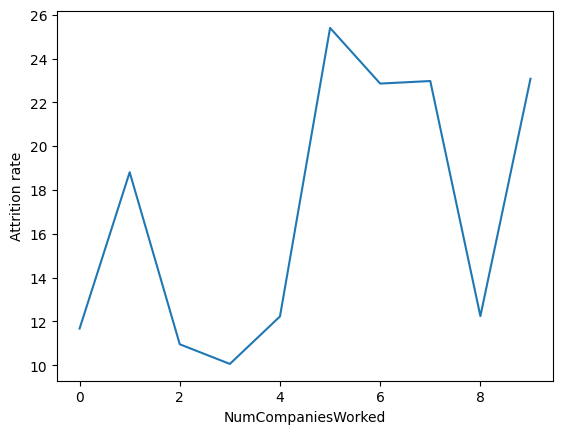

In [19]:
sns.lineplot(data = Past_Att, x = Past_Att.index, y = 'Attrition rate')

<Axes: ylabel='NumCompaniesWorked'>

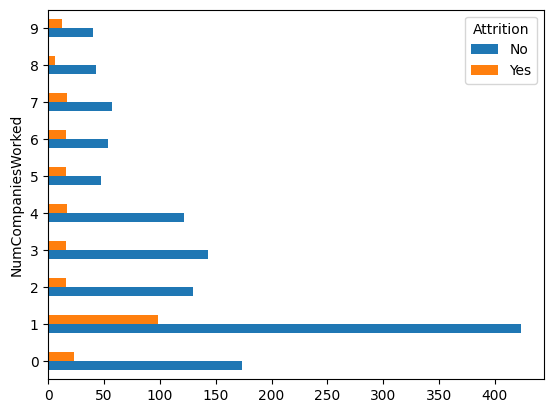

In [20]:
df.groupby('NumCompaniesWorked')['Attrition'].value_counts().unstack().plot.barh()

***Observation:*** 
1. There is no good to pattern to attrition over employee past worked companies.

**8. Which age category does the attrition rate is more?**

<Axes: xlabel='Age', ylabel='Count'>

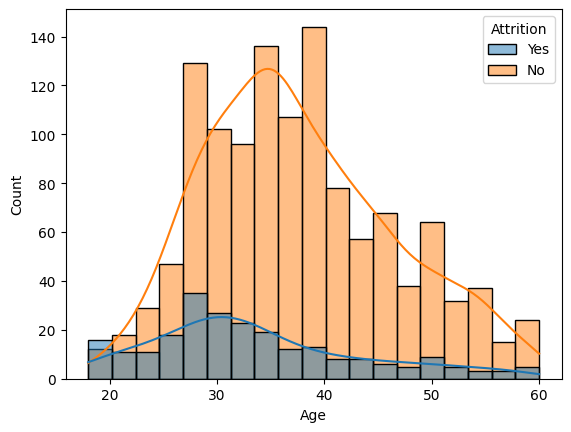

In [21]:
sns.histplot(data = df, x = 'Age', hue = 'Attrition', kde = True)

***Observations:***
1. Employees with low age have higher attrition rate.
2. The attrition rate keeps decreasing as the age gets increasing.

**9. How does the maritial status and gender impacts attrition?**

In [22]:
df.groupby(['Gender','MaritalStatus'])['Attrition'].value_counts()

Gender  MaritalStatus  Attrition
Female  Divorced       No           108
                       Yes            9
        Married        No           241
                       Yes           31
        Single         No           152
                       Yes           47
Male    Divorced       No           186
                       Yes           24
        Married        No           348
                       Yes           53
        Single         No           198
                       Yes           73
Name: count, dtype: int64

<Axes: ylabel='Gender,MaritalStatus,Attrition'>

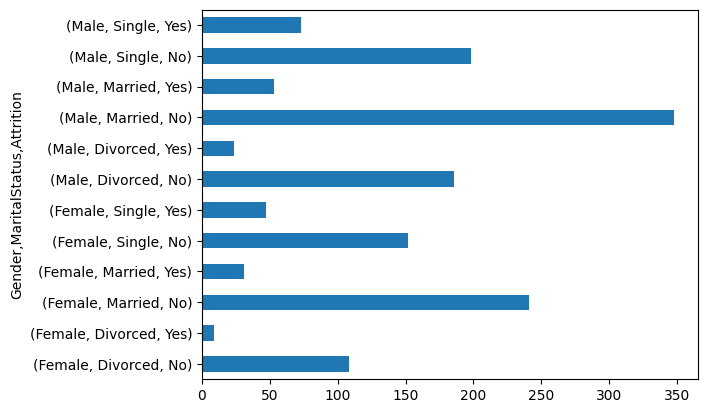

In [23]:
df.groupby(['Gender','MaritalStatus'])['Attrition'].value_counts().plot.barh()

***Observation:***
1. We can clearly determine that gender with: male and marital status with: single are likely to increase attrition rate.
2. Most of the employees are male and married.

**10. Does environment satisfaction impacts attrition rate?**

In [24]:
ES_Att = pd.crosstab(df['EnvironmentSatisfaction'], df['Attrition'])
ES_Att['Attrition rate'] = (ES_Att['Yes']/(ES_Att['Yes'] + ES_Att['No'])) *100
ES_Att

Attrition,No,Yes,Attrition rate
EnvironmentSatisfaction,,,
High,391,62,13.686534
Low,212,72,25.352113
Medium,244,43,14.982578
Very high,386,60,13.452915


<Axes: ylabel='EnvironmentSatisfaction'>

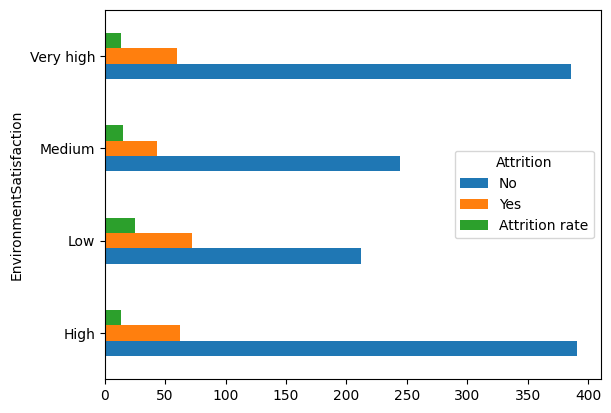

In [25]:
ES_Att.plot.barh()

***Observation:*** 
1. The employees with low EnvironmentSatisfaction are likely to increase attrition rate.
2. Most of the employees are satisfied well.

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0


**11. Do the employees with less salary are likely to increase the attrition rate?**

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

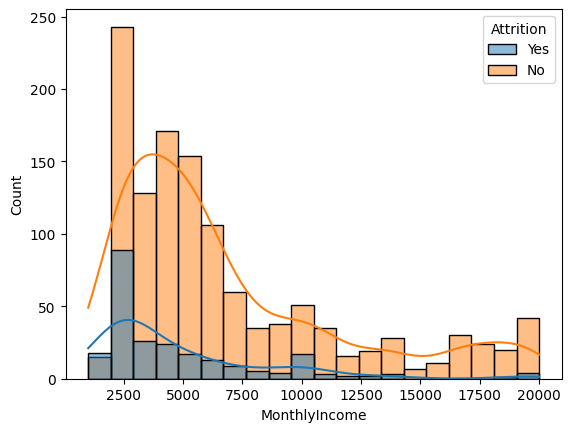

In [27]:
sns.histplot(data = df, x = 'MonthlyIncome', hue = 'Attrition', kde = True)

In [28]:
df1 = df.copy()
df1['MonthlyIncome'] = df1['MonthlyIncome'].apply(lambda x : 'Low' if x <= 2911 else ('Medium' if x <= 8379 else 'High'))

In [29]:
MI_Att = pd.crosstab(df1['MonthlyIncome'],df1['Attrition'])
MI_Att['Attrition rate'] = (MI_Att['Yes']/(MI_Att['Yes'] + MI_Att['No'])) *100
MI_Att

Attrition,No,Yes,Attrition rate
MonthlyIncome,,,
High,330,38,10.326087
Low,261,108,29.268293
Medium,642,91,12.414734


<Axes: ylabel='MonthlyIncome'>

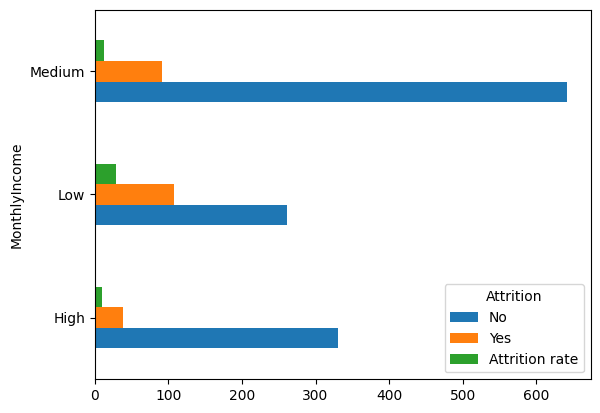

In [30]:
MI_Att.plot.barh()

***Observation:*** 
1. It is clear that employees with low income are likely to increase attrition rate.
2. Most of the employees get medium income.

**12. Which gender is likely to stay in the company?**

In [33]:
MI_Att = pd.crosstab(df1['Gender'],df1['Attrition'])
MI_Att['Attrition rate'] = (MI_Att['Yes']/(MI_Att['Yes'] + MI_Att['No'])) *100
MI_Att

Attrition,No,Yes,Attrition rate
Gender,,,
Female,501,87,14.795918
Male,732,150,17.006803


<Axes: ylabel='Gender'>

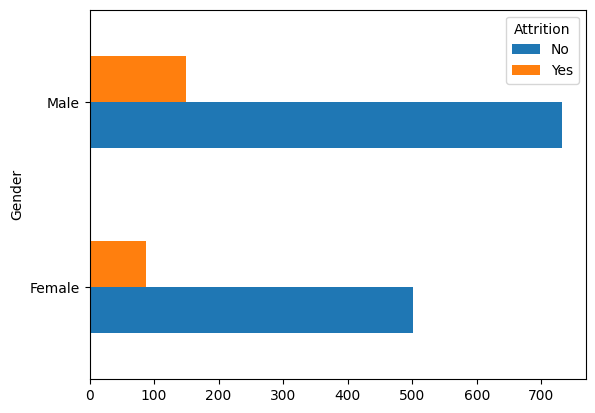

In [37]:
pd.crosstab(df1['Gender'],df1['Attrition']).plot.barh()

***Observation:***
1. Female are more likely to stay in the company than male.

**13. Does the marriage status impacts attrition rate?**

In [38]:
MI_Att = pd.crosstab(df1['MaritalStatus'],df1['Attrition'])
MI_Att['Attrition rate'] = (MI_Att['Yes']/(MI_Att['Yes'] + MI_Att['No'])) *100
MI_Att

Attrition,No,Yes,Attrition rate
MaritalStatus,,,
Divorced,294,33,10.091743
Married,589,84,12.481426
Single,350,120,25.531915


<Axes: ylabel='MaritalStatus'>

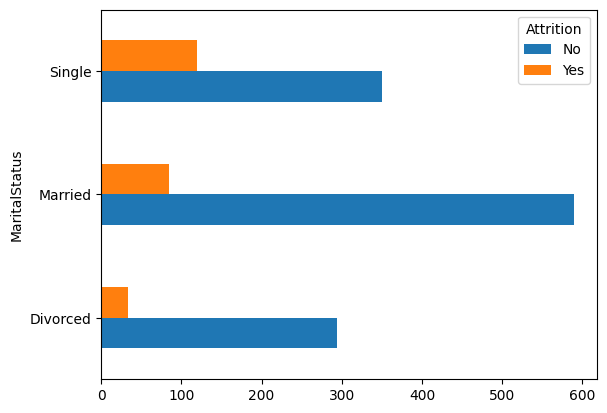

In [40]:
pd.crosstab(df1['MaritalStatus'],df1['Attrition']).plot.barh()

***Observation:***
1. Singles are more likely to increase the attrition rate.
2. Most of the employees are married.

***14. Which job level has a great job involvement?***

In [45]:
pd.crosstab(df1['JobLevel'],df1['JobInvolvement'])

JobInvolvement,High,Low,Medium,Very high
JobLevel,,,,
Fresher,318,30,137,58
Junior,317,35,128,54
Manager,43,5,17,4
Senior,128,10,66,14
Team Lead,62,3,27,14


<Axes: ylabel='JobLevel'>

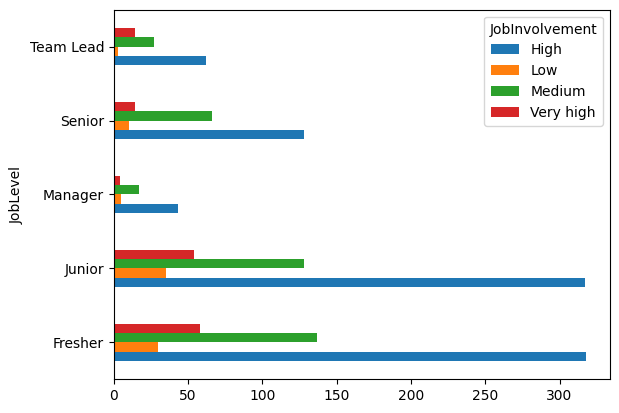

In [46]:
pd.crosstab(df1['JobLevel'],df1['JobInvolvement']).plot.barh()

***Observations:***
1. Freshers and Juniors have high job involvement.
2. But as we see most of employees are from freshers and juniors.

***15. Does the employees with long distance to their home are likely to increase attrition rate?***

<Axes: xlabel='DistanceFromHome', ylabel='Count'>

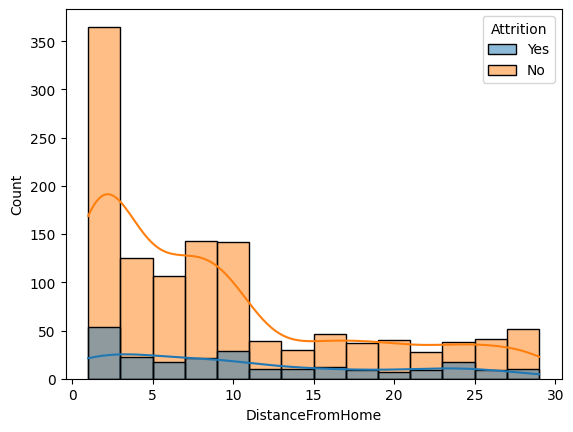

In [47]:
sns.histplot(data = df, x = 'DistanceFromHome', hue = 'Attrition', kde = True)

***Observations:***
1. Here we can't conclude that attrition depends on DistanceFromHome.

***16. Does the year spent at same company increase attrition rate?***

<Axes: xlabel='YearsAtCompany'>

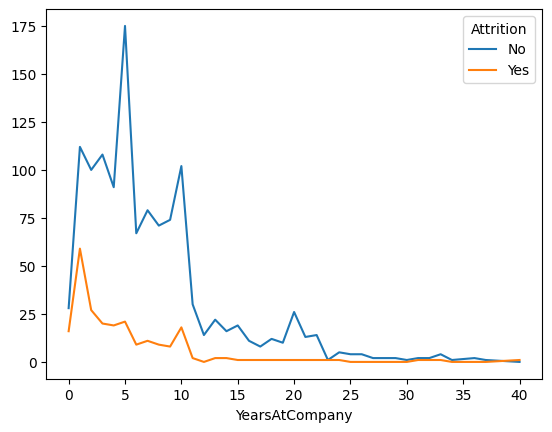

In [51]:
pd.crosstab(df1['YearsAtCompany'],df1['Attrition']).plot()

***Observations:***
1. As the Years at company increases the attrition rate decreases.
2. We can conclude that the employees who joined recently are more likely to increase attrition rate.

***17. Does the low job involvement had a chance to increase attrition rate?***

In [54]:
JBI_Att = pd.crosstab(df1['JobInvolvement'],df1['Attrition'])
JBI_Att['Attrition rate'] = (JBI_Att['Yes']/(JBI_Att['Yes'] + JBI_Att['No'])) *100
JBI_Att

Attrition,No,Yes,Attrition rate
JobInvolvement,,,
High,743,125,14.400922
Low,55,28,33.734940
Medium,304,71,18.933333
Very high,131,13,9.027778


<Axes: ylabel='JobInvolvement'>

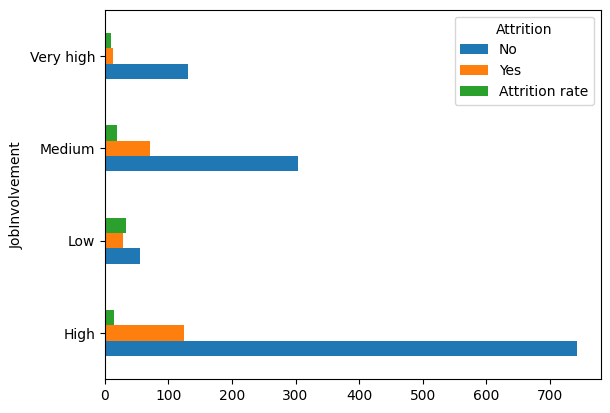

In [55]:
JBI_Att.plot.barh()

***Observation:***
    1. Employees with low job involvement are more likely to increase the attrition rate.

***18. Which level of job has higher attrition rate?***

In [61]:
JBLVL_Att = pd.crosstab(df1['JobLevel'],df1['Attrition'])
JBLVL_Att['Attrition rate'] = (JBLVL_Att['Yes']/(JBLVL_Att['Yes'] + JBLVL_Att['No'])) *100
JBLVL_Att

Attrition,No,Yes,Attrition rate
JobLevel,,,
Fresher,400,143,26.335175
Junior,482,52,9.737828
Manager,64,5,7.246377
Senior,186,32,14.678899
Team Lead,101,5,4.716981


<Axes: ylabel='JobLevel'>

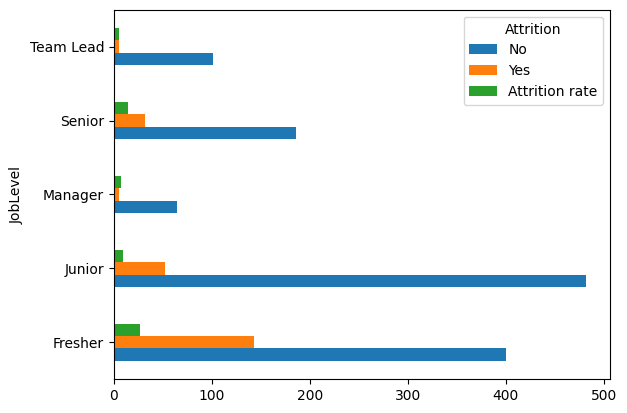

In [62]:
JBLVL_Att.plot.barh()

***Observation:***
1. Freshers and seniors have higher attrition rate.

***19. Which job role has higher attrition?***

<Axes: ylabel='JobRole'>

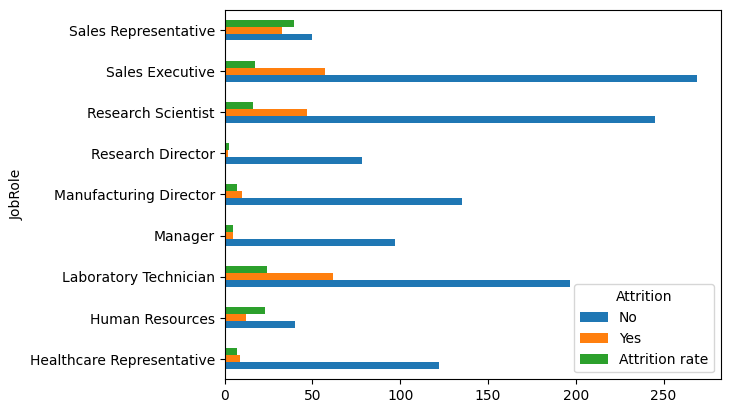

In [64]:
JBR_Att.plot.barh()

In [63]:
JBR_Att = pd.crosstab(df1['JobRole'],df1['Attrition'])
JBR_Att['Attrition rate'] = (JBR_Att['Yes']/(JBR_Att['Yes'] + JBR_Att['No'])) *100
JBR_Att

Attrition,No,Yes,Attrition rate
JobRole,,,
Healthcare Representative,122,9,6.870229
Human Resources,40,12,23.076923
Laboratory Technician,197,62,23.938224
Manager,97,5,4.901961
Manufacturing Director,135,10,6.896552
Research Director,78,2,2.500000
Research Scientist,245,47,16.095890
Sales Executive,269,57,17.484663
Sales Representative,50,33,39.759036


***Observation:***
1.Sales Representative have higher attrition rate.

***20. Does the low job satisfaction leads to increase in attrition rate?***

In [68]:
SAT_Att = pd.crosstab(df1['JobSatisfaction'],df1['Attrition'])
SAT_Att['Attrition rate'] = (SAT_Att['Yes']/(SAT_Att['Yes'] + SAT_Att['No'])) *100
SAT_Att

Attrition,No,Yes,Attrition rate
JobSatisfaction,,,
High,369,73,16.515837
Low,223,66,22.837370
Medium,234,46,16.428571
Very high,407,52,11.328976


<Axes: ylabel='JobSatisfaction'>

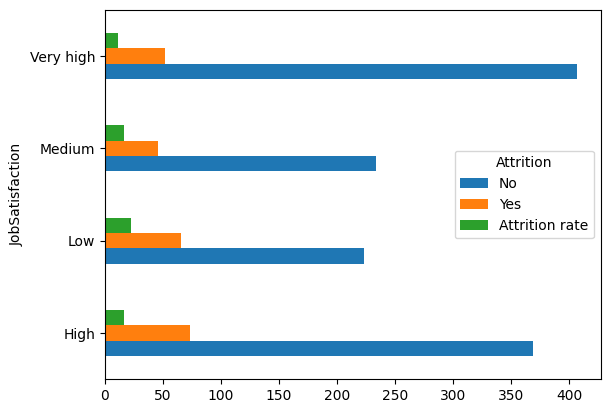

In [69]:
SAT_Att.plot.barh()

***Observation:***
1. The employees with low JobSatisfaction are more likely to increase attrition rate.

**21. Which job level employee are likely to do over time?**

In [74]:
OT = pd.crosstab(df1['JobLevel'],df1['OverTime'])
OT['overtime Percentage'] = (OT['Yes']/(OT['Yes'] + OT['No'])) *100
OT

OverTime,No,Yes,overtime Percentage
JobLevel,,,
Fresher,387,156,28.729282
Junior,388,146,27.340824
Manager,51,18,26.086957
Senior,155,63,28.899083
Team Lead,73,33,31.132075


<Axes: ylabel='JobLevel'>

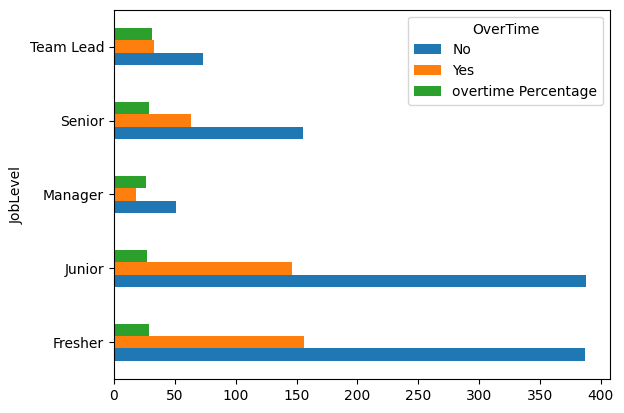

In [75]:
OT.plot.barh()

***Observation:***
1. Team Leads are more likely to do over time.

***22. Does the over time increases in attrition rate?***

In [80]:
OTa = pd.crosstab(df1['OverTime'],df1['Attrition'])
OTa['AttritionRate'] = (OTa['Yes']/(OTa['Yes'] + OTa['No'])) *100
OTa

Attrition,No,Yes,AttritionRate
OverTime,,,
No,944,110,10.436433
Yes,289,127,30.528846


<Axes: ylabel='OverTime'>

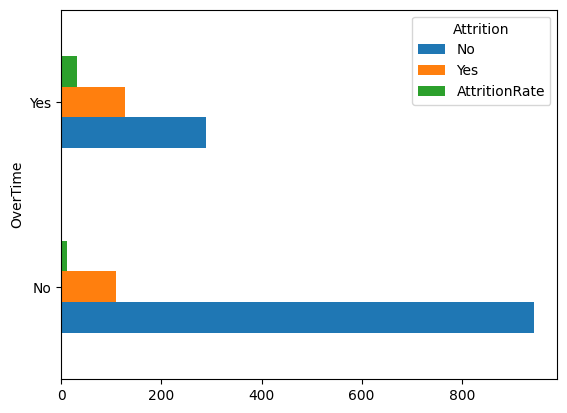

In [81]:
OTa.plot.barh()

***Observation:***
1. The employees who does over time are likely to increase the attrition rate.

***23. Which category of performance rating has higher attrition rate?***

In [84]:
pa = pd.crosstab(df1['PerformanceRating'],df1['Attrition'])
pa['AttritionRate'] = (pa['Yes']/(pa['Yes'] + pa['No'])) *100
pa

Attrition,No,Yes,AttritionRate
PerformanceRating,,,
Excellent,1044,200,16.077170
Outstanding,189,37,16.371681


<Axes: ylabel='PerformanceRating'>

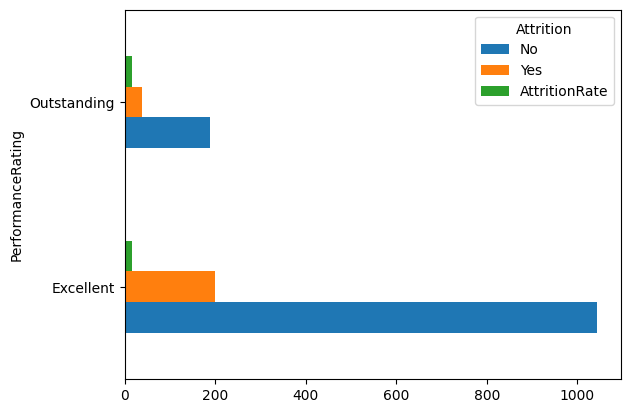

In [86]:
pa.plot.barh()

***Observation:***
1. we can't determine the attrition over performance rating.

***24. Does the poor relationship satisfaction had more attrition rate?***

In [87]:
ra = pd.crosstab(df1['RelationshipSatisfaction'],df1['Attrition'])
ra['AttritionRate'] = (ra['Yes']/(ra['Yes'] + ra['No'])) *100
ra

Attrition,No,Yes,AttritionRate
RelationshipSatisfaction,,,
Excellent,388,71,15.468410
Good,258,45,14.851485
Outstanding,368,64,14.814815
Poor,219,57,20.652174


<Axes: ylabel='RelationshipSatisfaction'>

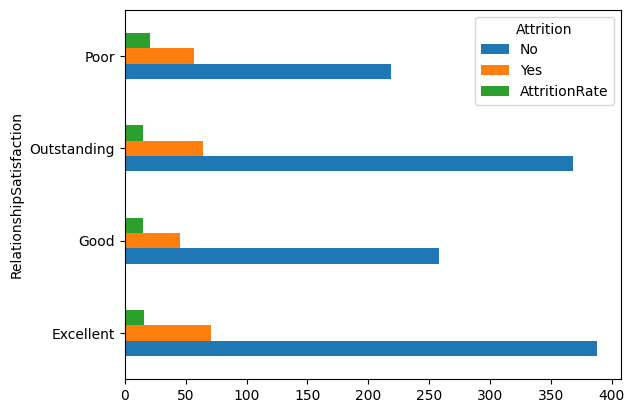

In [88]:
ra.plot.barh()

***Observation:***
1. The employees with RelationshipSatisfaction have higher attrition rate.

***25. Does an employee likely to leave a company with poor work life balance?***

In [89]:
wlb = pd.crosstab(df1['WorkLifeBalance'],df1['Attrition'])
wlb['AttritionRate'] = (wlb['Yes']/(wlb['Yes'] + wlb['No'])) *100
wlb

Attrition,No,Yes,AttritionRate
WorkLifeBalance,,,
Best,126,27,17.647059
Better,766,127,14.221725
Good,286,58,16.860465
Poor,55,25,31.250000


<Axes: ylabel='WorkLifeBalance'>

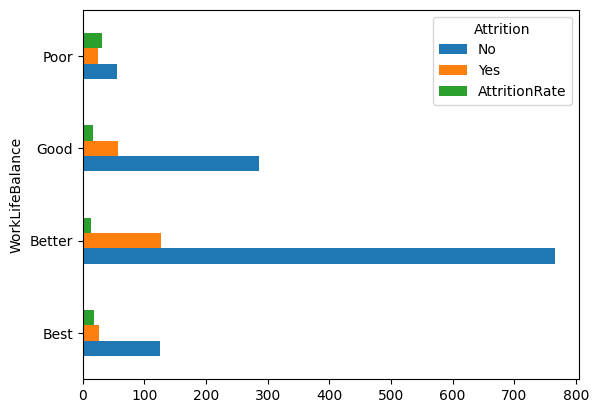

In [90]:
wlb.plot.barh()

***Observations:***
1. Yes, Employee likely to leave a company with poor work life balance.

Thus many features are explored through visualization.